<a href="https://colab.research.google.com/github/luorix1/ML_DL-self_study/blob/main/imdb_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import SpatialDropout1D

In [4]:
# output directory
output_dir = 'model_output/dense'

# train
epochs = 4
batch_size = 128

# vector space embedding
n_dim = 64
n_unique_words = 5000
n_words_to_skip = 50
max_review_length = 100
pad_type = trunc_type = 'pre'
drop_embed = 0.2

# convolution layers
n_conv = 256
k_conv = 3

# dense layers
n_dense = 256
dropout = 0.2

In [9]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words, skip_top=n_words_to_skip)

17473536/17464789 [==============================] - 0s 0us/step


In [13]:
# pad and cut text
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type)

In [5]:
# model
model = Sequential()

# vector space embedding
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))

# convolution layers
model.add(Conv1D(n_conv, k_conv, activation='relu'))
model.add(GlobalMaxPooling1D())

# dense layers
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))

# output layer
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# set checkpoint
modelcheckpoint = ModelCheckpoint(filepath=output_dir + '/weights.{epoch:02d}.hdf5')

if not os.path.exists(output_dir):
  os.makedirs(output_dir)

In [14]:
# train model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 27s 131ms/step - loss: 0.5180 - accuracy: 0.7223 - val_loss: 0.3773 - val_accuracy: 0.8293
Epoch 2/4
196/196 [==============================] - 25s 130ms/step - loss: 0.3179 - accuracy: 0.8650 - val_loss: 0.3575 - val_accuracy: 0.8421
Epoch 3/4
196/196 [==============================] - 26s 131ms/step - loss: 0.2392 - accuracy: 0.9039 - val_loss: 0.3603 - val_accuracy: 0.8434
Epoch 4/4
196/196 [==============================] - 26s 130ms/step - loss: 0.1716 - accuracy: 0.9338 - val_loss: 0.4719 - val_accuracy: 0.8234


In [15]:
model.load_weights(output_dir + '/weights.03.hdf5')

In [16]:
# calculate y hat
y_hat = model.predict(x_valid)
print(y_hat)

[[0.12821403]
 [0.9784823 ]
 [0.9733495 ]
 ...
 [0.01879212]
 [0.04542023]
 [0.57409734]]


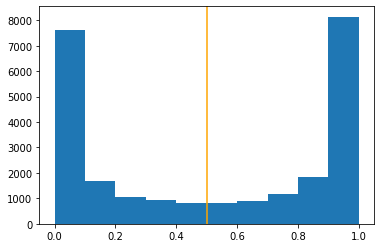

In [17]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')